In [99]:
# notebooks/compare_countries.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np


from notebook_helpers import add_project_root_to_path
from src.solar_data_analysis import DataAnalysis

In [100]:
# Create a DataAnalysis instances for benin,togo and sierraleone 
togo = DataAnalysis(r"C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data\togo_clean.csv")
benin = DataAnalysis(r"C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data\benin_clean.csv")
sierraleone = DataAnalysis(r"C:\Users\bekuman\Desktop\moonlight-solar-strategy-analysis\data\sierraaleone_clean.csv")


In [101]:
#load each country cleaned csv file 
togo.load_data()
benin.load_data()
sierraleone.load_data()

Dataset loaded successfully.
Dataset loaded successfully.
Dataset loaded successfully.


In [102]:
# Add country identifiers
togo.df['Country'] = 'Togo'
benin.df['Country'] = 'Benin'
sierraleone.df['Country'] = 'Sierra Leone'

In [103]:
# Combine datasets
combined = pd.concat([togo.df, benin.df, sierraleone.df])

## 1 Metric Comparison

#### Boxplots

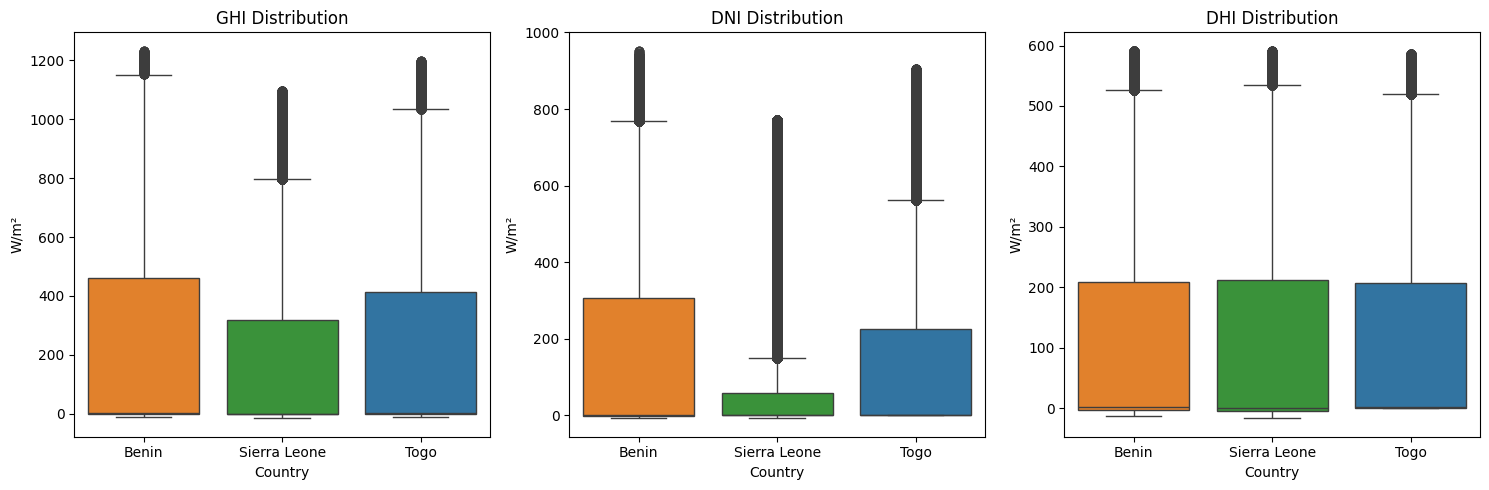

In [104]:
# Boxplots of GHI, DNI, DHI side-by-side for three countries
plt.figure(figsize=(15, 5))
metrics = ['GHI', 'DNI', 'DHI']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined, 
                order=['Benin', 'Sierra Leone', 'Togo'],
                palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
                legend=False,
                hue='Country'
                )
    plt.title(f'{metric} Distribution')
    plt.ylabel('W/m²' if metric != 'Tamb' else '°C')
plt.tight_layout()
plt.show()

#### Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [105]:
# Group by Country and calculate mean, median, and std for GHI, DNI, DHI
summary = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Flatten multi-level column names
summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.round(2)
display(summary)


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,232.78,1.8,327.08,164.44,-0.1,260.92,110.04,1.6,152.55
Sierra Leone,179.27,0.3,276.52,100.89,-0.1,198.64,104.75,-0.1,152.45
Togo,219.96,2.1,315.85,145.37,0.0,246.26,110.84,2.5,150.93


## 2  Statistical Testing

In [106]:
# One-way ANOVA on GHI across countries
benin_ghi = benin.df['GHI']
togo_ghi = togo.df['GHI']
sierra_ghi = sierraleone.df['GHI']

# Perform ANOVA
f_stat, p_value_anova = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)

# Perform Kruskal-Wallis (non-parametric alternative)
h_stat, p_value_kruskal = stats.kruskal(benin_ghi, sierra_ghi, togo_ghi)

print(f"One-way ANOVA p-value: {p_value_anova:.4f}")
print(f"Kruskal-Wallis p-value: {p_value_kruskal:.4f}")


One-way ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


## 3 Key Observations

Benin has the highest mean GHI (232.78 W/m²), but also the highest variability (std: 327.08).

Togo has the highest median GHI (2.1), suggesting it delivers more consistent mid-range solar performance with slightly lower variability than Benin.

Sierra Leone records the lowest mean and median GHI.

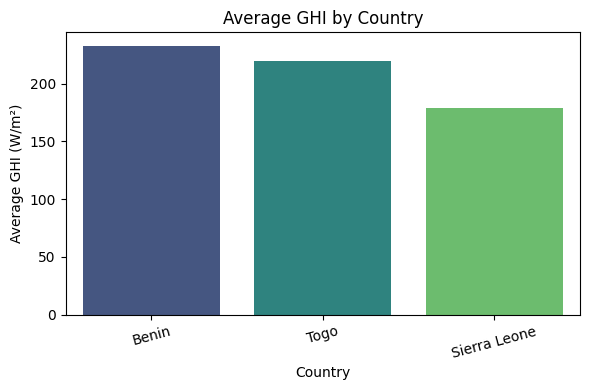

In [ ]:
# Calculate average GHI by country
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Bar chart: Average GHI by country (warning-free version)
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, hue=avg_ghi.index, palette='viridis', dodge=False, legend=False)
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

